# **Text similarity with different embeddings**


Text Similarity is one of the essential techniques of NLP which is being used 
to find the closeness between two chunks of text by it’s meaning or by surface.
In order to perform such tasks, various word embedding techniques are being used i.e., Bag of Words, TF-IDF, word2vec to encode the text data. This will allow you to perform NLP operations such as finding similarity between two sentences

## **Similarity Measures**

### **1. Jaccard Index**

Jaccard index, also known as Jaccard similarity coefficient, treats the data objects like sets. It is defined as the size of the intersection of two sets divided by the size of the union. 

Example:

Sentence 1: The bottle is empty.

Sentence 2: There is nothing in the bottle.

To calculate the similarity using Jaccard similarity, we must first perform text normalization to reduce words their roots/lemmas.

In the above example,

Size of the intersection of these two sentences: 3

Size of the union of these two sentences: 1+3+3 = 7

Using the Jaccard index, we get a similarity score of 3/7 = 0.42

In [1]:
def jaccard_similarity(x,y):
    intersection = len(set.intersection(*[set(x), set(y)]))
    union = len(set.union(*[set(x), set(y)]))
    return intersection/float(union)

In [2]:
sentences = ["The bottle is empty","The bottle is not empty"]
sentences = [sent.lower().split(" ") for sent in sentences]
jaccard_similarity(sentences[0], sentences[1])

0.8

### **2. Euclidean Distance**

Euclidean distance, or L2 norm, is the most commonly used form of the Minkowski distance. Generally speaking, when people talk about distance, they refer to Euclidean distance. It uses the Pythagoras theorem to calculate the distance between two points|

In [10]:
from math import sqrt
def euclidean_distance(x,y):
    """ return euclidean distance between two lists """
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [11]:
x = [1,2,3]#Representation of vectors
y = [1,2,4]   #Representation of vectors
euclidean_distance(x,y)

1.0

The distances can vary from 0 to infinity, we need to use some way to normalize them to the range of 0 to 1.
Although we have our typical normalization formula that uses mean and standard deviation, it is sensitive to outliers. That means if there are a few extremely large distances, every other distance will become smaller as a consequence of the normalization operation.

In [12]:
from math import exp
def distance_to_similarity(distance):
    return 1/exp(distance)

distance_to_similarity(8.774964387392123)

0.00015455440504595275

In [13]:
def euclidean_distance_normalised(x,y):
    """ return euclidean distance between two lists """
    euclidean_distance = sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
    return 1/exp(euclidean_distance)

In [14]:
x = [1,2,3]   #Representation of vectors
y = [1,2,4] #Representation of vectors
euclidean_distance_normalised(x,y)

0.36787944117144233

### **3. Cosine Similarity**

Cosine Similarity computes the similarity of two vectors as the cosine of the angle between two vectors. It determines whether two vectors are pointing in roughly the same direction. So if the angle between the vectors is 0 degrees, then the cosine similarity is 1.

In [15]:
def cos_similarity(x,y):
    """ return cosine similarity between two lists """
 
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = round(sqrt(sum([a*a for a in x])),3) * round(sqrt(sum([a*a for a in y])),3)
    return round(numerator/float(denominator),3)

In [16]:
x = [1,2,3]
y = [1,2,4]
cos_similarity(x,y)

0.991

# **Different Similirity Measure with embeddings**

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#Data
sentences = [
#Crypto
'Investors unfazed by correction as crypto funds see $154 million inflows',
'Bitcoin, Ethereum prices continue descent, but crypto funds see inflows',
 
#Inflation
'The surge in euro area inflation during the pandemic: transitory but with upside risks',
"Inflation: why it's temporary and raising interest rates will do more harm than good",
 
#common
'Will Cryptocurrency Protect Against Inflation?']

labels = [sentence[:25] for sentence in sentences]

In [18]:
def create_heatmap(similarity):
    df = pd.DataFrame(similarity)
    df.columns = labels
    df.index = labels
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
arr = X.toarray()

cosine_similarity(arr)

array([[1.        , 0.38138504, 0.        , 0.        , 0.        ],
       [0.38138504, 1.        , 0.07905694, 0.        , 0.        ],
       [0.        , 0.07905694, 1.        , 0.06681531, 0.1118034 ],
       [0.        , 0.        , 0.06681531, 1.        , 0.23904572],
       [0.        , 0.        , 0.1118034 , 0.23904572, 1.        ]])

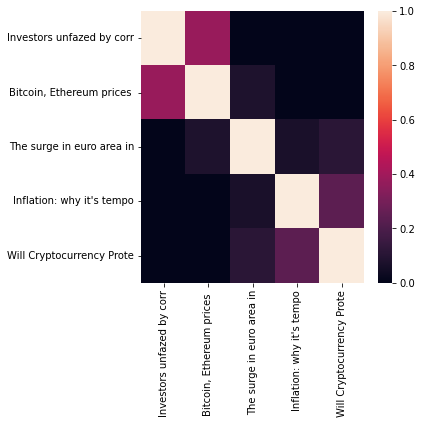

In [23]:
create_heatmap(cosine_similarity(arr))

In [31]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_arr = euclidean_distances(arr)
nrm_euclidean_distances = [[1/exp(i) for i in euclidean_arr[x]] for x in range(len(euclidean_arr))]

In [32]:
nrm_euclidean_distances

[[1.0,
  0.02717246117223556,
  0.005537830714382472,
  0.006737946999085467,
  0.018315638888734182],
 [0.02717246117223556,
  1.0,
  0.007454186295369829,
  0.007454186295369829,
  0.020796234419099814],
 [0.005537830714382472,
  0.007454186295369829,
  1.0,
  0.005034190088132767,
  0.012792465124422179],
 [0.006737946999085467,
  0.007454186295369829,
  0.005034190088132767,
  1.0,
  0.020796234419099814],
 [0.018315638888734182,
  0.020796234419099814,
  0.012792465124422179,
  0.020796234419099814,
  1.0]]

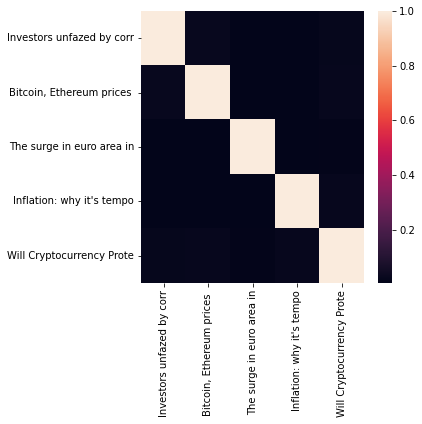

In [33]:
create_heatmap(nrm_euclidean_distances)